In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import pandas as pd
import numpy as np
import os
import pybedtools
import warnings
from collections import defaultdict
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_colwidth', 500)
from tqdm import tnrange, tqdm_notebook

import matplotlib

In [2]:
# other useful locations:
motif_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/motif_coords/GCATG_RBFOX_MOTIF_POSITIONS_ALL.bed'
# motif_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/motif_coords/FAKE_MOTIF.bed'
# motif_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/motif_coords/TTTTT_TIA_MOTIF_POSITIONS_ALL.bed'
# apo_motif_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/UGUA_APOBEC_MOTIF_POSITIONS_ALL.bed'

# peak files:
# peak_with_motif_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/301.01v02.IDR.out.0102merged.bed.annotated_proxdist_miRlncRNA.blacklist_removed.with.all.bed'
peak_with_motif_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/figure_1/outputs/EV42_01.basedon_EV42_01.peaks.l2inputnormnew.bed.compressed.bed.annotated.with.GCATG.bed'
# peak_with_motif_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/TIA1_Untreated_reproducible_peaks.bed.with.TTTTT.bed'
# peak_with_motif_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/764_01.basedon_764_01.peaks.l2inputnormnew.bed.compressed.bed.with.CGA.bed'
# peak_with_motif_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/RANDOM_BG_764.bed'
# peak_with_motif_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/279_01.basedon_279_01.peaks.l2inputnormnew.bed.compressed.bed.with.CGTG.bed.noGCATG.bed'

# annotated peak files:
# annotated_peak_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/301.01v02.IDR.out.0102merged.bed.annotated_proxdist_miRlncRNA.blacklist_removed.with.all.bed'
annotated_peak_file = '/home/elvannostrand/data/clip/CLIPseq_analysis/ALLCLIP_v12_20160112/EV42_01.basedon_EV42_01.peaks.l2inputnormnew.bed.compressed.bed.annotated'
# annotated_peak_file = '/home/elvannostrand/data/clip/CLIPseq_analysis/seCLIP/seRBFOX2_A_01.basedon_seRBFOX2_A_01.peaks.l2inputnormnew.bed.compressed.bed.annotated'
# annotated_peak_file = '/home/bay001/projects/kris_apobec_20200121/reference_data/TIA1_Untreated_reproducible_peaks.bed.annotated_proxdist_miRlncRNA'

# Only get randomized regions from 3'UTR or CDS:
regions_file_for_random_subset = '/projects/ps-yeolab3/bay001/annotations/hg19/gencode_v19/hg19_v19_cds_and_three_prime_utrs.bed'

# edit files:
# edit_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/combined_outputs_w_cov_info/SRSF1_16_S24_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated'
# edit_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/combined_outputs_w_cov_info/SRSF1_15_S23_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated'
# edit_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/combined_outputs_w_cov_info/SRSF1_13_S21_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated'
edit_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/combined_outputs_w_cov_info/RBFOX2-1000_S20_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated'
# edit_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/combined_outputs_w_cov_info/Sample19_S17_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated.shuffled'
# edit_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/combined_outputs_w_cov_info/Sample20_S18_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated'
# edit_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/combined_outputs_w_cov_info/RBFOX2-1000_S20_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_c10.annotated'
# edit_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/combined_outputs_w_cov_info/RBFOX2-1000_S20_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_c20.annotated'
# edit_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/combined_outputs_w_cov_info/Tia1_1000ng_2_S27_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated'

apo_edit_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/combined_outputs_w_cov_info/ApoControl-1000_S21_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.bed'
# apo_edit_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/combined_outputs_w_cov_info/RBFOX2-0_S6_L001_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated'

# BAM files:
# bam_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data/20200328_kris_rnaseq/results/SRSF1_15_S23_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam'
# bam_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data/20200328_kris_rnaseq/results/SRSF1_16_S24_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam'
bam_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data/20191003_riboseq/results/RBFOX2-1000_S20_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam'
# bam_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data/20200309_kris_RBFOX2_rnaseq/Sample19_S17_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam'
# bam_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data/20200309_kris_RBFOX2_rnaseq/Sample20_S18_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam'
# bam_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data/20191003_riboseq/results/ApoControl-1000_S21_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam'
# bam_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data/20200228_kris_rnaseq/results/Tia1_1000ng_2_S27_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam'

# Genome file
chrom_sizes = '/projects/ps-yeolab3/bay001/annotations/hg19/hg19.chrom.sizes'

In [3]:
output_dir = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/figure_1/outputs/kedits_bar_graphs/no_apo100_filter/'

# First let's figure out a proper 'background' region. Best is any expressed CDS+3'UTR region?

In [4]:
output_counts = os.path.join(output_dir, '{}.counts.txt'.format(os.path.basename(bam_file)))
output_counts

'/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/figure_1/outputs/kedits_bar_graphs/incl_apo_1000/RBFOX2-1000_S20_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam.counts.txt'

In [5]:
# Create a SAF file of just 3'UTRs and CDS
regions_file_for_random_subset_SAF = os.path.join(output_dir, os.path.splitext(os.path.basename(regions_file_for_random_subset))[0] + ".SAF")

utr_bed = pd.read_csv(
    regions_file_for_random_subset, 
    sep='\t', 
    names=['chrom','start','end','name','score','strand']
)
utr_bed['start1base'] = utr_bed['start'] + 1
utr_saf = utr_bed[['name','chrom','start1base','end','strand']]
utr_saf.to_csv(regions_file_for_random_subset_SAF, sep='\t', index=False, header=False)

In [6]:
# Call featureCounts on BAM file and convert to TPM. Grey this out if we're only testing the one sample.

cmd = "module load subreadfeaturecounts;featureCounts "
cmd += "-a {} ".format(regions_file_for_random_subset_SAF) 
cmd += "-F SAF -M -O -s 2 -o {} ".format(output_counts)
cmd += "{}".format(bam_file)
print(cmd)
! $cmd

module load subreadfeaturecounts;featureCounts -a /home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/figure_1/outputs/kedits_bar_graphs/incl_apo_1000/hg19_v19_cds_and_three_prime_utrs.SAF -F SAF -M -O -s 2 -o /home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/figure_1/outputs/kedits_bar_graphs/incl_apo_1000/RBFOX2-1000_S20_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam.counts.txt /home/bay001/projects/kris_apobec_20200121/permanent_data/20191003_riboseq/results/RBFOX2-1000_S20_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam

        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |

### Convert to counts and generate a subset of 3'UTRs to sample from using a TPM cutoff of... 3? 5?

In [7]:
def counts_to_rpkm(feature_counts_table):
    counts = feature_counts_table.ix[:,5:]
    lengths = feature_counts_table['Length']
    mapped_reads = counts.sum()
    return (counts * pow(10,9)).div(mapped_reads, axis=1).div(lengths, axis=0)

def counts_to_tpm(counts_table, skip_col=5):
    """
    simple function that converts a featureCounts pandas Dataframe
    into a TPM dataframe.
    
    :param counts_table: pandas.DataFrame() 
        either a featureCounts table (first five cols contain non-count info,
        the rest contain raw counts) or a generic counts table (use skip_col=0
        in this case)
    :return tpm: pandas.DataFrame
    """
    rpkm = counts_to_rpkm(counts_table)
    tpm = rpkm.div(rpkm.sum())*pow(10,6)
    return tpm

counts_table = pd.read_csv(output_counts, index_col=0, skiprows=1, sep='\t')
tpm = counts_to_tpm(counts_table)
tpm.sort_values(by=bam_file, ascending=True).head()

/projects/ps-yeolab4/software/yeolabconda3/envs/python3essential-0.0.1/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,/home/bay001/projects/kris_apobec_20200121/permanent_data/20191003_riboseq/results/RBFOX2-1000_S20_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam
Geneid,
ENSG00000186092.4,0.0
ENSG00000172154.4,0.0
ENSG00000181785.1,0.0
ENSG00000259009.3,0.0
ENSG00000174970.2,0.0


In [8]:
# edit conf level
CONF = 0.99
# defines how close an edit needs to be from a peak to be a 'close' edit.
d = 50

# peak params
l2fc = 3
l10p = 3

random_trial_num = 100  # number of random trials to compute mean/stdev

# Read in edit data and see what the average expression is.

In [9]:
edits_df = pd.read_csv(edit_file, sep='\t', names=['chrom','start','end','conf','count','strand','geneid','genename','region','annotation'])
print("Number of total edits: {}".format(edits_df.shape[0]))
edits_df = edits_df[edits_df['conf']>CONF][['chrom','start','end','region','geneid','strand']]
edits_df = edits_df[(edits_df['region']=='3utr') | (edits_df['region']=='CDS')]
edits_df.to_csv(os.path.join(output_dir, 'FILTERED_EDITS.bed'), sep='\t', index=False, header=False)
print("Number of edits after filtering regions, confidence: {}".format(edits_df.shape[0]))
edits_df_expressed = set(edits_df['geneid'])
len(edits_df_expressed)

Number of total edits: 403256
Number of edits after filtering regions, confidence: 60605


6193

In [10]:
edited_genes_tpm = tpm.loc[edits_df_expressed]
edited_genes_tpm.dropna(inplace=True)
# edge case
edited_genes_tpm = edited_genes_tpm[edited_genes_tpm[bam_file]>0]
tpm_cutoff = edited_genes_tpm[bam_file].min()
print(tpm_cutoff)

0.4365756176714063


In [11]:
bed = pd.read_csv(regions_file_for_random_subset, sep='\t', names=['chrom','start','end','name','score','strand'])
# expressed = list(expressed_genes.index)
expressed = list(tpm[tpm[bam_file]>=tpm_cutoff].index)
print("Number of expressed genes with TPM cutoff of {}: {}".format(tpm_cutoff, len(expressed)))

Number of expressed genes with TPM cutoff of 0.4365756176714063: 13131


# Roughly gives us an idea of how many genes we're randomly selecting from. 

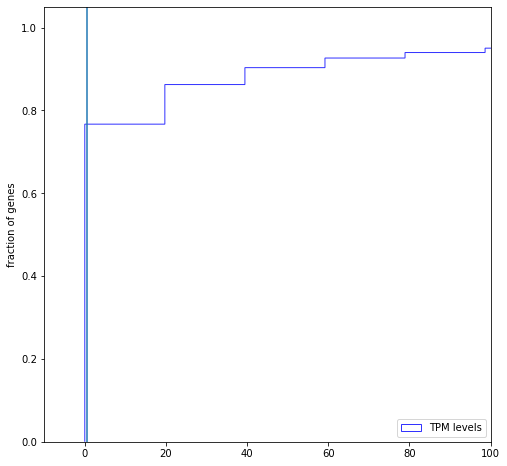

In [12]:
fig, ax = plt.subplots(figsize=(8, 8))
x = plt.hist(tpm[bam_file], bins=1000, density=True, cumulative=True,
         histtype='step', alpha=0.8, color='blue', label='TPM levels')
plt.ylabel('fraction of genes')
plt.axvline(tpm_cutoff)
plt.xlim(-10, 100)
plt.legend(loc=4)

# Main params

# This is where we select genes only passing TPM cutoffs set above.

In [13]:
bed_expressed = bed[bed['name'].isin(expressed)]

In [14]:
regions_file_for_random_subset_expressed = os.path.join(output_dir, os.path.splitext(os.path.basename(regions_file_for_random_subset))[0] + ".expressed.bed")
bed_expressed.to_csv(regions_file_for_random_subset_expressed, sep='\t', index=False, header=False)

# Function needs to read in various types of inputs.

In [15]:
def read_and_return_peak_bedtool(fn, annotated='ericv1', l2fc=l2fc, l10p=l10p):
    """
    I'm read in peak files from various sources.
    ericv1 : version 1 of eric's annotator script, what he used in his 2016 dataset.
    ericv2 : version 2 of eric's annotator script, which annotates lncRNAs, miRs, etc.
    no : just the standard input normalized peak file
    motif : generated using the SUPPLEMENTAL notebook which searches a set of peaks for a motif
    """
    if annotated == 'ericv1': # this is an 'eric-style' annotation
        peaks = pd.read_csv(fn, names=['chrom','start','end','l10p','l2fc','strand','annotation','geneid'], sep='\t')
        print("Total number of peaks: {}".format(peaks.shape[0]))
        peaks['region'] = peaks['annotation'].apply(lambda x: x.split('|')[0])
        peaks = peaks[(peaks['region']=='CDS') | (peaks['region']=='3utr')]
        peaks = peaks[(peaks['l10p']>=l10p) & (peaks['l2fc']>=l2fc)]
        peaks = peaks[['chrom','start','end','geneid','l2fc','strand']]
    elif annotated == 'motif': # I pre-parse the eCLIP peaks in another notebook and in doing so, I lose the l10p and l2fc information. That's okay, I filter in that notebook prior.
        peaks = pd.read_csv(fn, names=['chrom','start','end','l10p','l2fc','strand'], sep='\t')
        print("Total number of peaks: {}".format(peaks.shape[0]))
    elif annotated == 'no': # basic input-normalized BED6
        peaks = pd.read_csv(fn, names=['chrom','start','end','l10p','l2fc','strand'], sep='\t')
        print("Total number of peaks: {}".format(peaks.shape[0]))
        peaks = peaks[(peaks['l10p']>=l10p) & (peaks['l2fc']>=l2fc)]
    elif annotated == 'ericv2':
        peaks = pd.read_csv(fn, names=['chrom','start','end','l10p','l2fc','strand','annotation','annotation2','geneid','genename','region_w_overlap'], sep='\t')
        peaks['region'] = peaks['region_w_overlap'].apply(lambda x: x.split('|')[0])
        peaks = peaks[(peaks['region']=='CDS') | (peaks['region']=='3utr')]
        peaks = peaks[(peaks['l10p']>=l10p) & (peaks['l2fc']>=l2fc)]
        peaks = peaks[['chrom','start','end','geneid','l2fc','strand']]
    # merge neighboring peaks just to make sure we're not overlapping still
    print("Number of peaks after filtering for significance: {}".format(peaks.shape[0]))
    unmerged_peaks = pybedtools.BedTool.from_dataframe(peaks).sort()
    merged_peaks = unmerged_peaks.merge(d=1, c=(4,5,6), o=('collapse','collapse','distinct')).sort()
    print("Number of peaks after merging neighboring peaks: {}".format(merged_peaks.to_dataframe().shape[0]))
    merged_peaks.saveas('/home/bay001/EV42.bed')
    return merged_peaks

#### Also worth knowing how many 'peaks' lie in areas with little/no coverage.
- I don't actually do anything with these vars, just want the numbers.

# Read in and filter our edits file. Just 3'UTR and CDS edits only at whichever conf level.
- Also will try and save your filtered edits file here: FILTERED_EDITS.bed

Number of total edits: 403256
Number of edits after filtering confidence: 69554
Number of edits after filtering regions, confidence: 60605


,chrom,start,end,region,conf,strand
81,chr1,2239485,2239486,3utr,0.999388,+
91,chr1,2239851,2239852,3utr,0.994820,+
93,chr1,2239899,2239900,3utr,0.999271,+
96,chr1,2239930,2239931,3utr,0.999584,+
97,chr1,2239932,2239933,3utr,0.991599,+


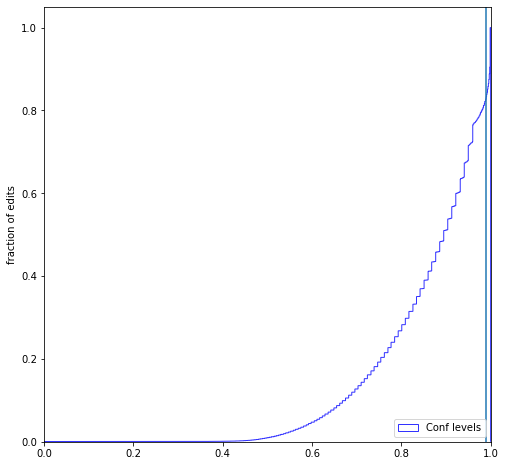

In [16]:
edits_df = pd.read_csv(edit_file, sep='\t', names=['chrom','start','end','conf','count','strand','geneid','genename','region','annotation'])
fig, ax = plt.subplots(figsize=(8, 8))
x = plt.hist(edits_df['conf'], bins=1000, density=True, cumulative=True,
         histtype='step', alpha=0.8, color='blue', label='Conf levels')
plt.ylabel('fraction of edits')
plt.xlim(0, 1)
plt.axvline(CONF)
plt.legend(loc=4)

print("Number of total edits: {}".format(edits_df.shape[0]))
edits_df = edits_df[edits_df['conf']>CONF][['chrom','start','end','region','conf','strand']]
print("Number of edits after filtering confidence: {}".format(edits_df.shape[0]))
edits_df = edits_df[(edits_df['region']=='3utr') | (edits_df['region']=='CDS')]
edits_df.to_csv(os.path.join(output_dir, 'FILTERED_EDITS.bed'), sep='\t', index=False, header=False)
print("Number of edits after filtering regions, confidence: {}".format(edits_df.shape[0]))

edits_df.head()

# Let's read in our peak file (and filter if necessary). 
- Let's define our edits as:
    - MUST pass a conf filter defined above (0.99 or 0.999)
    - MUST NOT overlap an Apobec-1000 edit (Actually we are keeping these as it only removes ~3% of all edits). So let's not use this filter for now to keep this figure consistent with the rest.
- Let's define our peak set as:
    - MUST pass l2fc and l10p value cutoff defined above (3, 3)
    - MUST contain a GCATG motif (or CATGC if negative strand)
- Let's also define our randomized regions as:
    - MUST be in a CDS or 3'UTR as defined by Gencode 19
    - MUST carry expression of at least 5 TPM (across the length of the 3'UTR/CDS)
    - MUST NOT contain any motif (or be 300 nucleotides away)
    - MUST NOT be \< 300 nucleotides away from a real peak

In [17]:
peaks = read_and_return_peak_bedtool(peak_with_motif_file, annotated='motif')      # uncomment this line if we want to look at peaks with a motif
# peaks = read_and_return_peak_bedtool(annotated_peak_file, annotated='yes')       # uncomment this line if we want to look at all peaks

avoid_these_real_peak_regions = peaks.slop(b=d, g=chrom_sizes).sort()
avoid_these_real_peak_regions = avoid_these_real_peak_regions.to_dataframe()
avoid_these_real_peak_regions.to_csv(os.path.join(output_dir, 'tmp_peak_slopped.bed'), sep='\t', header=False, index=False)

motifs = pybedtools.BedTool(motif_file)
avoid_these_motifs_regions = motifs.slop(b=d, g=chrom_sizes).sort()
avoid_these_motifs_regions = avoid_these_motifs_regions.to_dataframe()
avoid_these_motifs_regions.to_csv(os.path.join(output_dir, 'tmp_motif_slopped.bed'), sep='\t', header=False, index=False)

avoid_these_regions = pd.concat([avoid_these_real_peak_regions, avoid_these_motifs_regions])
avoid_these_regions.to_csv(os.path.join(output_dir, 'tmp.bed'), sep='\t', header=False, index=False)
edits = pybedtools.BedTool.from_dataframe(edits_df).sort()
unfiltered_edits = pybedtools.BedTool.from_dataframe(edits_df).sort()
print("Before removing apo edits: {}".format(unfiltered_edits.to_dataframe().shape[0]))
# edits = unfiltered_edits.intersect(apo_edit_file, s=True, v=True)
print("After removing apo edits: {}".format(edits.to_dataframe().shape[0]))

Total number of peaks: 270
Number of peaks after filtering for significance: 270
Number of peaks after merging neighboring peaks: 257
Before removing apo edits: 60605
After removing apo edits: 60605


### Perform BedTools subtract to remove the "avoid_these_regions" from the pool of viable random coordinates.
- The "after" regions may be greater than "before" since BedTools subtract may split up exons if it finds a motif/peak within them. 

In [18]:
unfiltered_regions_for_random_selection = pybedtools.BedTool(regions_file_for_random_subset_expressed).sort()
print("If we're selecting from a completely random subset of regions_file_for_random_subset_expressed: {}".format(unfiltered_regions_for_random_selection.to_dataframe().shape[0]))
real_regions_to_avoid = pybedtools.BedTool.from_dataframe(avoid_these_regions).sort()
filtered_regions_for_random_selection = unfiltered_regions_for_random_selection.subtract(real_regions_to_avoid, s=True)
print("After filtering out real regions, the regions_file_for_random_subset_expressed looks like this: {}".format(filtered_regions_for_random_selection.to_dataframe().shape[0]))

If we're selecting from a completely random subset of regions_file_for_random_subset_expressed: 206246
After filtering out real regions, the regions_file_for_random_subset_expressed looks like this: 232451


### save this filtered file

In [19]:
filtered_regions_for_random_selection.saveas(regions_file_for_random_subset_expressed + ".filtered.bed")

<BedTool(/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/figure_1/outputs/kedits_bar_graphs/incl_apo_1000/hg19_v19_cds_and_three_prime_utrs.expressed.bed.filtered.bed)>

# What if we require at least k edits be nearby?
- 

In [20]:
def is_close(row, d, k):
    """
    parses out a merged BEDfile (c=(4,5,6), o=('collapse','collapse','distinct'))
    d = distance threshold for an edit to be 'close'
    k = number of edits that need to meet this threshold.
    
    Loop over close edits found. If the number of edits (whose distance 
    is less than d) exceeds k, then the peak is found to have at least
    k edits d distance away. 
    """
    close_edits = 0
    far_edits = 0
    try:
        estarts = str(row['name']).split(',')
        distances = str(row['score']).split(',')

        for distance, estart in zip(distances, estarts):
            if int(distance) <= d and int(estart) != -1:
                close_edits += 1
            else:
                far_edits += 1
        if close_edits >= k:
            return True
        else:
            return False
    except AttributeError: # row['name'] = -1 meaning no close edit was found.
        return False

def get_peaks_with_k_edits_d_nearby(peaks, edits, k, d, r='real'):
    """
    closest returns foreach peak k closest edits at d = True. 
    Require the edit to exist on the same strand as the real peak
    """
    
    if r == 'real':
        closest = peaks.closest(edits, s=True, t='all', k=k, d=True).to_dataframe(
            names=[
                'pchrom','pstart','pend','pname','pscore','pstrand',
                'echrom','estart','eend','ename','escore','estrand',
                'dist'
            ]
        )[['pchrom','pstart','pend','estart','dist','pstrand']]
    # Random peaks don't preserve strandedness, so we'll just look for any close edit.
    elif r == 'rand':
        closest = peaks.closest(edits, t='all', k=k, d=True).to_dataframe(
            names=[
                'pchrom','pstart','pend','pname','pscore','pstrand',
                'echrom','estart','eend','ename','escore','estrand',
                'dist'
            ]
        )[['pchrom','pstart','pend','estart','dist','pstrand']]
    else: 
        print("r not valid {}".format(r))
        return 1
    closest.columns = ['chrom','start','end','name','score','strand']
    # print(closest.shape[0])
    closest = pybedtools.BedTool.from_dataframe(closest)
    
    # Collapse all peak regions. Multiple edits (name=edit start, score=distance) are collapsed into a single row, comma-delimited.
    pre_merge_size = closest.to_dataframe().shape[0]
    closest_pre_merged = closest.to_dataframe().copy()
    closest = closest.merge(s=True, c=(4,5,6), o=('collapse','collapse','distinct')).to_dataframe()
    post_merge_size = closest.shape[0]
    # print("Pre vs post merge size (k={}): {} -> {}".format(k, pre_merge_size, post_merge_size))
    # Use the is_close() function to count the number of edits found within [d]istance. True if at least k edits found.
    closest['close'] = closest.apply(is_close, args=(d, k,), axis=1)
    # print(closest.shape[0])
    close = closest[closest['close']==True].shape[0]
    far = closest[closest['close']==False].shape[0]
    try:
        assert closest.shape[0] == len(peaks)    # Sanity check make sure we're collapsing correctly.
    except AssertionError: # may occur if two random regions are placed next to each other
        if len(peaks) - closest.shape[0] > 10:
            print("Too many neighboring random regions!")
        # print(closest.shape[0], len(peaks))
        # print(closest.head())
    return close, far, closest, closest_pre_merged

# lists to keep track of each random trial generated.
close_rands = defaultdict(list)
far_rands = defaultdict(list)

# dictionary (will be coerced into dataframe) of number of peaks with at least k edits.
df_real = defaultdict(list)
# df_rand = defaultdict(list) # deprecating this in favor of random trials
progress = tnrange(10, desc="Calculating edit nums on/near peaks.")
for k in range(1, 11):
    close_real, far_real, _, unmerged = get_peaks_with_k_edits_d_nearby(peaks, edits, k, d, 'real')
    # closest_unmerged contains all the "close" edits found on or nearby peaks of interest. 
    # just check that the majority are not the same edits. 
    # OK if we see the same edit close to two different peaks, but report the number anyway.
    # High fraction of double counted edits means perhaps we set d too high. Or, that peaks are close together. 
    closest_unmerged = unmerged[(unmerged['score'] <= d)]
    closest_unmerged_duplicated = closest_unmerged[closest_unmerged.duplicated(['chrom','name','strand'])]
    print(
        "Number of double counted edits: {} out of {} ({:.2f}%)".format(
            closest_unmerged_duplicated.shape[0], 
            closest_unmerged.drop_duplicates(['chrom','name','strand']).shape[0],
            (100*closest_unmerged_duplicated.shape[0])/closest_unmerged.drop_duplicates(['chrom','name','strand']).shape[0]
        )
    )
    inner_progress = tnrange(random_trial_num, leave=False, desc='Random trial')
    for random_trial in range(random_trial_num):
        random = peaks.shuffle(
            genome='hg19', 
            incl=regions_file_for_random_subset_expressed + ".filtered.bed", 
            noOverlapping=True
        ).sort()
        close_rand, far_rand, _, _ = get_peaks_with_k_edits_d_nearby(random, edits, k, d, 'rand')
        close_rands[k].append(close_rand)
        far_rands[k].append(far_rand)
        
        inner_progress.update(1)
    df_real[k] = [close_real, far_real]
    
    # df_rand[k] = [close_rand, far_rand]
    progress.update(1)

# Calculate mean/std deviation 
close_rands = pd.DataFrame(close_rands).T
far_rands = pd.DataFrame(far_rands).T

df_real = pd.DataFrame(df_real).T
df_real.columns = ['close','far']
df_real['class'] = 'real'
df_real = df_real[['close','far','class']]
df_real['trial'] = 0
df_real.reset_index(inplace=True)
df_real.head()

Number of double counted edits: 1 out of 155 (0.65%)


Number of double counted edits: 2 out of 172 (1.16%)


Number of double counted edits: 2 out of 185 (1.08%)


Number of double counted edits: 2 out of 196 (1.02%)


Number of double counted edits: 3 out of 213 (1.41%)


Number of double counted edits: 3 out of 230 (1.30%)


Number of double counted edits: 3 out of 245 (1.22%)


Number of double counted edits: 3 out of 256 (1.17%)


Number of double counted edits: 3 out of 265 (1.13%)


Number of double counted edits: 3 out of 272 (1.10%)


,index,close,far,class,trial
0,1,77,180,real,0
1,2,44,213,real,0
2,3,33,224,real,0
3,4,25,232,real,0
4,5,23,234,real,0


# The next few cells are me trying to format the random dataframe in such a way that can be plotted using Seaborn's barplot function

In [21]:
close_rands_melted = close_rands.reset_index().melt(id_vars='index', value_name='close', var_name='trial')
far_rands_melted = far_rands.reset_index().melt(id_vars='index', value_name='far', var_name='trial')
df_rand = pd.merge(close_rands_melted, far_rands_melted, how='inner', left_on=['index','trial'], right_on=['index','trial'])
df_rand['class'] = 'rand'
df_rand = df_rand[['index','close','far','class','trial']]
df_rand.head()

,index,close,far,class,trial
0,1,16,241,rand,0
1,2,7,250,rand,0
2,3,7,250,rand,0
3,4,4,253,rand,0
4,5,3,254,rand,0


In [22]:
df = pd.concat([df_real, df_rand])
df['fraction'] = df['close']/(df['close'] + df['far'])
df.to_csv(os.path.join(output_dir, "{}.{}.{}.{}.{}.{}.calculations.txt".format(os.path.splitext(os.path.basename(edit_file))[0], tpm_cutoff, CONF, d, l2fc, l10p)), sep='\t')
df.head()

,index,close,far,class,trial,fraction
0,1,77,180,real,0,0.299611
1,2,44,213,real,0,0.171206
2,3,33,224,real,0,0.128405
3,4,25,232,real,0,0.097276
4,5,23,234,real,0,0.089494


# Seaborn calculates and plots the standard deviation error bars for us, but we want the actual values. So these next few cells calculate the standard deviation of each random trial and computes the z-score. 
- to get a p-value for each k @Brian Yee please shuffle the choices of  random binding sites 100 times (At least) and compute a mean and std deviation value (so those will be the error bars) on the orange bars. p-value assume normal distribution for the Z score, k = (blue bar average - orange bar average )/ stdev

In [23]:
rand_fractions = close_rands.div((far_rands+close_rands))
rand_fractions['mean_rand_fraction'] = rand_fractions.mean(axis=1)
rand_fractions['standard_deviation'] = rand_fractions[list(range(0, random_trial_num))].std(axis=1)
rand_fractions.head()

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,mean_rand_fraction,standard_deviation
1,0.062257,0.066148,0.038911,0.089494,0.081712,0.058366,0.073930,0.085603,0.081712,0.066148,...,0.073930,0.066148,0.046693,0.101167,0.062257,0.066148,0.066148,0.066148,0.068288,0.015568
2,0.027237,0.023346,0.015564,0.050584,0.027237,0.062257,0.038911,0.027237,0.035019,0.035019,...,0.035019,0.019455,0.019455,0.046693,0.019455,0.038911,0.035019,0.027237,0.035486,0.011037
3,0.027237,0.027237,0.027237,0.023346,0.019455,0.023346,0.035019,0.015564,0.019455,0.038911,...,0.023346,0.042802,0.035019,0.046693,0.011673,0.015564,0.015564,0.031128,0.024942,0.009848
4,0.015564,0.011673,0.015564,0.015564,0.015564,0.007782,0.011673,0.011673,0.015564,0.007782,...,0.023346,0.023346,0.031128,0.019455,0.011673,0.027237,0.019455,0.007782,0.016809,0.008349
5,0.011673,0.015564,0.007782,0.003891,0.000000,0.007782,0.015564,0.007782,0.011673,0.023346,...,0.011673,0.019455,0.007782,0.007782,0.019455,0.011673,0.027237,0.015564,0.013074,0.007264


In [24]:
df_real['fraction'] = df_real['close']/(df_real['close'] + df_real['far'])
df_real.set_index('index', inplace=True)
df_real.head()

,close,far,class,trial,fraction
index,,,,,
1,77,180,real,0,0.299611
2,44,213,real,0,0.171206
3,33,224,real,0,0.128405
4,25,232,real,0,0.097276
5,23,234,real,0,0.089494


In [25]:
zscore_table = pd.merge(df_real, rand_fractions, how='inner', left_index=True, right_index=True)
zscore_table['zscore'] = (zscore_table['fraction'] - zscore_table['mean_rand_fraction'])/zscore_table['standard_deviation']
zscore_table.to_csv(os.path.join(output_dir, "{}.{}.{}.{}.{}.{}.zscores.txt".format(os.path.splitext(os.path.basename(edit_file))[0], tpm_cutoff, CONF, d, l2fc, l10p)), sep='\t')
zscore_table

,close,far,class,trial,fraction,0,1,2,3,4,...,93,94,95,96,97,98,99,mean_rand_fraction,standard_deviation,zscore
index,,,,,,,,,,,,,,,,,,,,,
1,77,180,real,0,0.299611,0.062257,0.066148,0.038911,0.089494,0.081712,...,0.066148,0.046693,0.101167,0.062257,0.066148,0.066148,0.066148,0.068288,0.015568,14.858983
2,44,213,real,0,0.171206,0.027237,0.023346,0.015564,0.050584,0.027237,...,0.019455,0.019455,0.046693,0.019455,0.038911,0.035019,0.027237,0.035486,0.011037,12.296594
3,33,224,real,0,0.128405,0.027237,0.027237,0.027237,0.023346,0.019455,...,0.042802,0.035019,0.046693,0.011673,0.015564,0.015564,0.031128,0.024942,0.009848,10.505730
4,25,232,real,0,0.097276,0.015564,0.011673,0.015564,0.015564,0.015564,...,0.023346,0.031128,0.019455,0.011673,0.027237,0.019455,0.007782,0.016809,0.008349,9.638291
5,23,234,real,0,0.089494,0.011673,0.015564,0.007782,0.003891,0.000000,...,0.019455,0.007782,0.007782,0.019455,0.011673,0.027237,0.015564,0.013074,0.007264,10.520209
6,19,238,real,0,0.073930,0.011673,0.003891,0.007782,0.015564,0.007782,...,0.011673,0.015564,0.011673,0.000000,0.011673,0.007782,0.007782,0.008755,0.006017,10.831470
7,17,240,real,0,0.066148,0.003891,0.003891,0.007782,0.000000,0.000000,...,0.007782,0.000000,0.007782,0.003891,0.007782,0.003891,0.003891,0.006265,0.005214,11.484248
8,13,244,real,0,0.050584,0.000000,0.003891,0.007782,0.000000,0.003891,...,0.007782,0.000000,0.003891,0.000000,0.000000,0.007782,0.000000,0.004241,0.003875,11.959024
9,11,246,real,0,0.042802,0.003891,0.011673,0.000000,0.003891,0.000000,...,0.000000,0.003891,0.000000,0.003891,0.000000,0.000000,0.003891,0.003113,0.003272,12.130222


# super, can u also make an extra y-axis and plot a line which is the ratio between blue and orange bars on the same plot

In [26]:
def get_ratio_real_rand(index, df):
    real = df.loc[index+1]['fraction']
    rand = df.loc[index+1]['mean_rand_fraction']
    if rand > 0:
        return real/rand
    else:
        return 400

ratio = defaultdict()

for i in range(0, 10):
    ratio[i] = get_ratio_real_rand(i, zscore_table)
    
ratio = pd.DataFrame(ratio, index=['ratio']).T
ratio

,ratio
0,4.387464
1,4.824561
2,5.148206
3,5.787037
4,6.845238
5,8.444444
6,10.559006
7,11.926606
8,13.750000
9,15.517241


# label each bar using z-scores calculated from above.

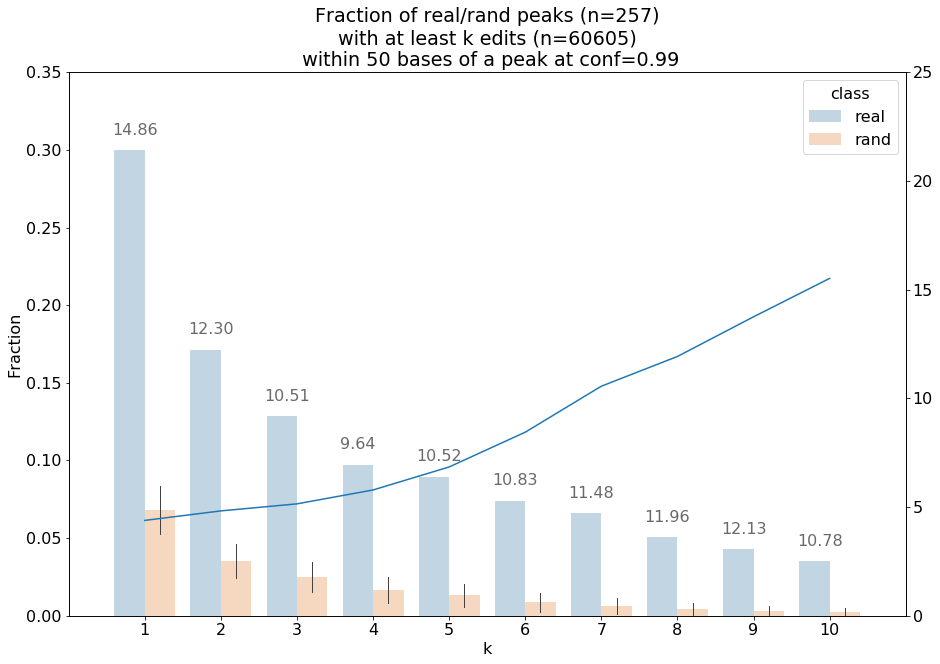

In [27]:
font = {
    'family' : 'DejaVu Sans',
    'weight' : 'normal',
    'size'   : 16
}
matplotlib.rc('font', **font)

fig, ax = plt.subplots(figsize=(15, 10))

ax = sns.barplot(x='index', y='fraction', hue='class', data=df, alpha=0.3, ci='sd', errwidth=1)
ax.set_ylabel("Fraction")
num_k = int(len(ax.patches)/2)
for i in range(num_k):
    # get_x pulls left or right; get_height pushes up or down
    ax.text(
        ax.patches[i].get_x()-.03, 
        ax.patches[i].get_height()+0.01, 
        "{:.2f}".format(zscore_table.iloc[i]['zscore']), 
        fontsize=16,
        color='dimgrey'
    )
ax.set_ylim(0, 0.35)
ax.set_xlim(-1, 10)
ax.set_xlabel('k')
ax.set_title("Fraction of real/rand peaks (n={})\nwith at least k edits (n={})\n within {} bases of a peak at conf={}".format(peaks.to_dataframe().shape[0], edits.to_dataframe().shape[0], d, CONF))

ax2 = ax.twinx()
ratio['ratio'].plot(ax=ax2)
ax2.set_ylim(0, 25)
ax2.set_xlim(-1, 10)
fig.savefig(os.path.join(output_dir, "{}.{}.{}.{}.{}.{}.svg".format(os.path.splitext(os.path.basename(edit_file))[0], tpm_cutoff, CONF, d, l2fc, l10p)))

# We can use this cell to determine where our false positives lie. Need to check some of these individually on IGV to see whether these look more like "True" binding sites just not picked up in this analysis. 
- ie. "SRSF10" so biologically what i think is happening is that RBFOX2 binds strongly in that intron, and weekly in the 3' UTR (sub 3 and 3 enrichment), but because we pA select our edit signal, we only see the binding “signal” in the 3'UTR.  just to keep in mind.

In [28]:
k = 3   # Number of edits required
d = 50 # Distance from random region

In [29]:
closest = random.closest(edits, t='all', k=k, d=True).to_dataframe(
    names=[
        'pchrom','pstart','pend','pname','pscore','pstrand',
        'echrom','estart','eend','ename','escore','estrand',
        'dist'
    ]
)[['pchrom','pstart','pend','estart','dist','pstrand']]
closest.columns = ['chrom','start','end','name','score','strand']
# print(closest.shape[0])
closest = pybedtools.BedTool.from_dataframe(closest)
closest = closest.merge(s=True, c=(4,5,6), o=('collapse','collapse','distinct')).to_dataframe()

closest['close'] = closest.apply(is_close, args=(d, k,), axis=1)

# These should be 'random' regions where at least k edits were found within d distance of the region.

In [30]:
closest[closest['close']==True]

,chrom,start,end,name,score,strand,close
17,chr1,160247978,160248075,"160248000,160248040,160248047","0,0,0",-,True
21,chr1,205682910,205682978,"205682935,205682959,205682980","0,0,3",-,True
52,chr12,58142137,58142259,"58142165,58142182,58142134","0,0,3",-,True
55,chr12,98995154,98995329,"98995193,98995298,98995327","0,0,0",-,True
80,chr14,100407518,100407599,"100407527,100407547,100407507","0,0,11",+,True
155,chr20,17588420,17588501,"17588489,17588492,17588526","0,0,26",+,True
165,chr22,29696286,29696453,"29696287,29696289,29696312,29696375,29696381,29696413,29696442","0,0,0,0,0,0,0",+,True
210,chr6,47200133,47200271,"47200151,47200162,47200292","0,0,22",-,True
225,chr7,112115596,112115721,"112115646,112115666,112115675,112115714,112115719","0,0,0,0,0",+,True
244,chr9,116025663,116025773,"116025671,116025676,116025715,116025718,116025725,116025735,116025740,116025766,116025769","0,0,0,0,0,0,0,0,0",-,True


# Go back and check the math

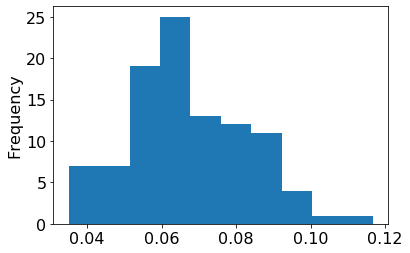

In [31]:
zscore_table.loc[1,[c for c in list(range(0,1000))]].plot(kind='hist')